In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

from sklearn.decomposition import TruncatedSVD
from scipy.linalg import svd
from sklearn.decomposition import PCA
from sklearn import datasets

load breast dataset and create dataframe

In [ ]:
#load breast cancer dataset and dataframe

breast = datasets.load_breast_cancer()
df = pd.DataFrame(breast.data, columns=breast.feature_names)
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

learn dataset info

In [ ]:
# Features and target variable
X = breast.data  # Features
y = breast.target  # Target variable (class labels)

# Display the feature names and target names
print("Feature Names:", breast.feature_names)
print("Target Names:", breast.target_names)

# Display the shape of the data
print("Data Shape:", X.shape)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:\n", X[:5])

Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Names: ['malignant' 'benign']
Data Shape: (569, 30)
First 5 rows of the dataset:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+0

scale data input

In [ ]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Normalization complete")

Normalization complete


In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=6)  # Use the optimal k-value from your tuning

# Initialize Leave-One-Out Cross-Validator
loo = LeaveOneOut()

# Lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the k-NN model
    knn_classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_classifier.predict(X_test)

    # Append true and predicted labels
    true_labels.append(y_test[0])  # Since LOOCV, there is only one test sample
    predicted_labels.append(y_pred[0])

# Calculate accuracy
accuracy_loocv = accuracy_score(true_labels, predicted_labels)

# Calculate classification error
classification_error_loocv = 1 - accuracy_loocv

print("Leave-One-Out Cross-Validation Accuracy:", accuracy_loocv)
print("Leave-One-Out Cross-Validation Classification Error:", classification_error_loocv)


Leave-One-Out Cross-Validation Accuracy: 0.9666080843585237
Leave-One-Out Cross-Validation Classification Error: 0.033391915641476255


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Create a pipeline with a scaler and k-NN classifier
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Define a range of k-values to search
param_grid = {'kneighborsclassifier__n_neighbors': range(1, 20)}

# Perform grid search with stratified 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding accuracy
print("Best k:", grid_search.best_params_['kneighborsclassifier__n_neighbors'])
print("Best Accuracy:", grid_search.best_score_)


Best k: 6
Best Accuracy: 0.9666666666666668


apply PCA

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
print("PCA done")

PCA done


apply SVD

In [ ]:
# Apply Truncated SVD
svd = TruncatedSVD(n_components=2)  # You can adjust the number of components based on your needs
X = svd.fit_transform(X)
print("SVD done")

SVD done


split data into train and test sets

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("split done")

split done


Standardize the data

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the same scaler
X_test_scaled = scaler.transform(X_test)

print("Normalization complete")

Normalization complete


Create a KNN classifier

In [ ]:
# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=6)  # You can adjust the value of k
print("knn created")

knn created


In [ ]:
# Original data
# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the scaled test set
y_pred = knn_classifier.predict(X_test)
print("Done")

Done


In [ ]:
# Normalized data
# Fit the model on the scaled training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = knn_classifier.predict(X_test_scaled)
print("Done")

Done


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print("Accuracy:", accuracy)
print("Error rate:", error_rate)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
Error rate: 0.03508771929824561

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.99      0.96      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



test various k

In [ ]:
# Experiment with different values of k (Original)
for k in range(1, 11):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"k = {k}, Accuracy = {accuracy:.4f}")

In [ ]:
# Experiment with different values of k (Normalized)
for k in range(1, 11):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"k = {k}, Accuracy = {accuracy:.4f}")


confusion matrix

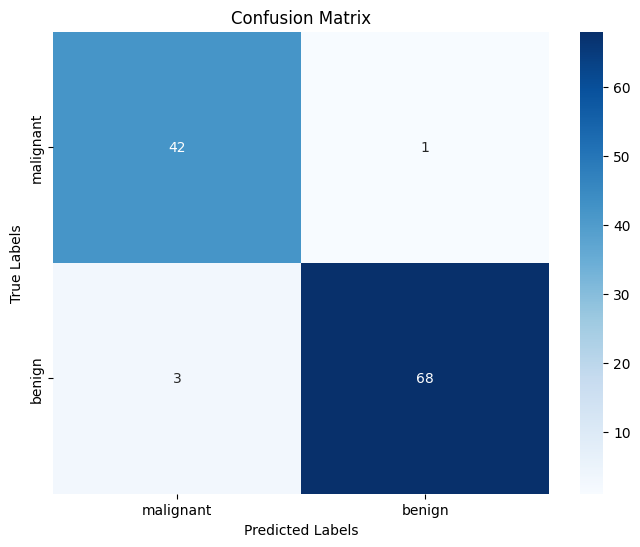

In [ ]:

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=breast.target_names, yticklabels=breast.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


f1-score, accuracy, recall, precision, support

In [ ]:
# Experiment with different values of k (Original)
accuracy_values = []
error_rate_values = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_error = 1 - accuracy  # Calculation of classification error

    accuracy_values.append(accuracy)
    error_rate_values.append(classification_error)

    report = classification_report(y_test, y_pred, target_names=breast.target_names, output_dict=True)
    print("===================================================================")
    print(f"{classification_report(y_test, y_pred)}")

    print(f"k = {k}")
    print("Accuracy:", accuracy)
    print("Classification Error:", classification_error)
    print("Classification Report:")
    for class_name, metrics in report.items():
        if class_name != 'accuracy':
            print(f"\nClass {class_name}")
            print(f"Precision: {metrics['precision']:0.2f}")
            print(f"Recall: {metrics['recall']:0.2f}")
            print(f"F1-score: {metrics['f1-score']:0.2f}")
            print(f"Support: {metrics['support']}")

    print("===================================================================")


              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

k = 1
Accuracy: 0.9736842105263158
Classification Error: 0.02631578947368418
Classification Report:

Class malignant
Precision: 0.95
Recall: 0.98
F1-score: 0.97
Support: 43

Class benign
Precision: 0.99
Recall: 0.97
F1-score: 0.98
Support: 71

Class macro avg
Precision: 0.97
Recall: 0.97
F1-score: 0.97
Support: 114

Class weighted avg
Precision: 0.97
Recall: 0.97
F1-score: 0.97
Support: 114
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        43
           1       0.99      0.93      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighte

In [ ]:
# Experiment with different values of k (Normalized)
accuracy_values = []
error_rate_values = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    #knn_classifier.fit(X_train, y_train)
    #y_pred = knn_classifier.predict(X_test)

    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    classification_error = 1 - accuracy  # Calculation of classification error

    accuracy_values.append(accuracy)
    error_rate_values.append(classification_error)

    report = classification_report(y_test, y_pred, target_names=breast.target_names, output_dict=True)
    print("===================================================================")
    print(f"{classification_report(y_test, y_pred)}")

    print(f"k = {k}")
    print("Accuracy:", accuracy)
    print("Classification Error:", classification_error)
    print("Classification Report:")
    for class_name, metrics in report.items():
        if class_name != 'accuracy':
            print(f"\nClass {class_name}")
            print(f"Precision: {metrics['precision']:0.2f}")
            print(f"Recall: {metrics['recall']:0.2f}")
            print(f"F1-score: {metrics['f1-score']:0.2f}")
            print(f"Support: {metrics['support']}")

    print("===================================================================")


              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

k = 1
Accuracy: 0.9385964912280702
Classification Error: 0.06140350877192979
Classification Report:

Class malignant
Precision: 0.93
Recall: 0.91
F1-score: 0.92
Support: 43

Class benign
Precision: 0.94
Recall: 0.96
F1-score: 0.95
Support: 71

Class macro avg
Precision: 0.94
Recall: 0.93
F1-score: 0.93
Support: 114

Class weighted avg
Precision: 0.94
Recall: 0.94
F1-score: 0.94
Support: 114
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighte

plotting accuracy table

In [ ]:
# Line plot for accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))  # Customize x-axis ticks
plt.grid(True)
plt.show()

plotting error rate table

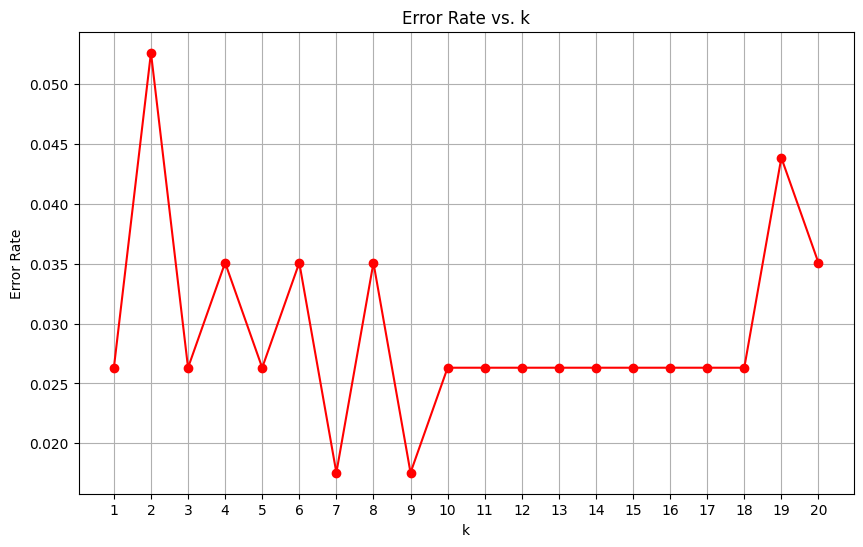

In [ ]:
# Line plot for error rate
error_rate_values = [1 - acc for acc in accuracy_values]  # Calculate error rate from accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rate_values, marker='o', linestyle='-', color='r')
plt.title('Error Rate vs. k')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))  # Customize x-axis ticks
plt.grid(True)
plt.show()